In [102]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from lmfit import Model
import scipy.stats

In [135]:
def plot_hist_and_fit(data):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)

    # plot histogram
    counts, edges, patches = ax.hist(data, bins=50, alpha=0.4)

    #centers of bins
    centers = (edges[1:]+edges[:-1])/2

    # fit using lmfit
    x = centers
    y = counts

    def gaussian(x, amp, cen, wid):
        """1-d gaussian: gaussian(x, amp, cen, wid)"""
        return (amp / (numpy.sqrt(2*numpy.pi) * wid)) * numpy.exp(-(x-cen)**2 / (2*wid**2))

    gmodel = Model(gaussian)
    result = gmodel.fit(y, x=x, amp=700, cen=1100, wid=70)

    print(result.fit_report())

    ax.plot(x, y, 'bo')
    ax.plot(x, result.best_fit, 'r-', label='best fit', color='blue')

    #calcualted percentiles from fitter gaussina distribution
    mu = result.params['cen'].value
    sigma = result.params['wid'].value
    amp = result.params['amp'].value

    #percentiles:
    percentiles = numpy.array((1,5,95,99))
    colors = ('r', 'g', 'b', 'yellow')
    x_perc = numpy.percentile(data, percentiles)
    for p,x_p,c in zip(percentiles, x_perc, colors):
        ax.axvline(x_p, label=f'perc data: {p}%', linestyle='--', color='green', linewidth=1)

    #percentiles from estimated gaussian function
    gauss_percentiles = scipy.stats.norm.ppf(percentiles/100., loc=mu, scale=sigma)
    for p,x_p in zip(percentiles,gauss_percentiles):
        ax.axvline(x_p, label=f'perc Gauss fit: {p}%', linestyle='--', color='red', linewidth=1)

    print(gauss_percentiles)    

    ax.legend(loc='best')
    plt.title(f'Gauss fit $\mu$: {mu:3.2f}, $\sigma$: {sigma:3.2f}, amp: {amp:3.2f}')
    return result

# Pu-239

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 50
    # variables        = 3
    chi-square         = 37807.4418
    reduced chi-square = 804.413656
    Akaike info crit   = 337.411912
    Bayesian info crit = 343.147981
[[Variables]]
    amp:  92077.7629 +/- 1479.83175 (1.61%) (init = 700)
    cen:  1093.60575 +/- 1.00888977 (0.09%) (init = 1100)
    wid:  54.4270193 +/- 1.01237429 (1.86%) (init = 70)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.579
[ 966.98957217 1004.08127272 1183.13023293 1220.22193347]


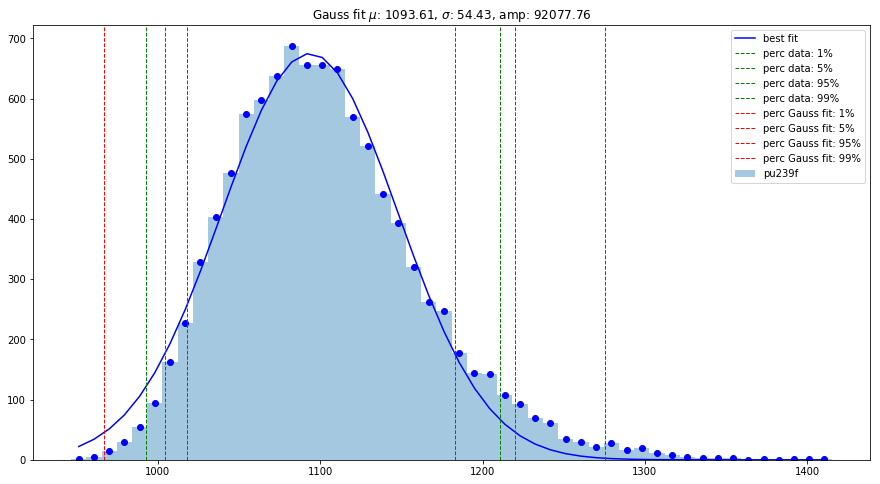

In [139]:
df = pd.read_csv('Pu239_104.csv')
data = df['pu239f']
data.shape

result = plot_hist_and_fit(data)

In [134]:
result

# U-235

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 50
    # variables        = 3
    chi-square         = 44959.3323
    reduced chi-square = 956.581538
    Akaike info crit   = 346.074531
    Bayesian info crit = 351.810600
[[Variables]]
    amp:  111893.904 +/- 1778.45984 (1.59%) (init = 700)
    cen:  1139.08209 +/- 0.99814729 (0.09%) (init = 1100)
    wid:  54.4411262 +/- 1.00122466 (1.84%) (init = 70)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.579
[1012.43309601 1049.53441033 1228.62977814 1265.73109246]


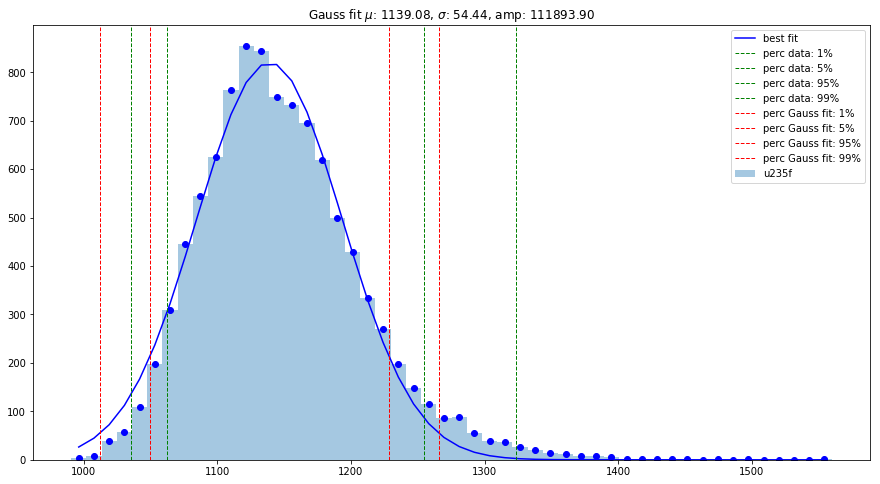

In [143]:
df = pd.read_csv('U235_104.csv')
data = df['u235f']
data.shape

result = plot_hist_and_fit(data)

In [144]:
result